TypeError: 'Categorical' with dtype category does not support reduction 'skew'

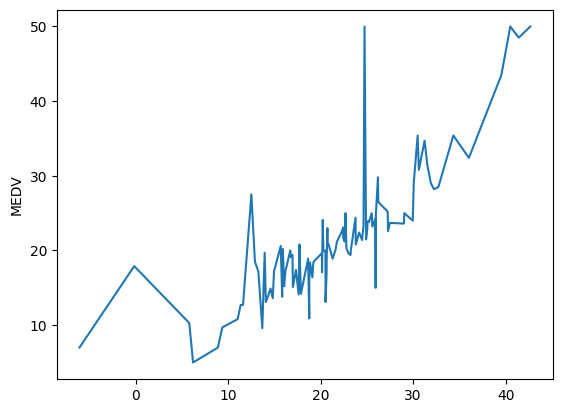

In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

X = df.drop('MEDV', axis=1)
X = X.apply(pd.to_numeric, errors='coerce')
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred =model.predict(X_test)
y_pred

sns.lineplot(x=y_pred, y=y_test)
plt.plot()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nModel Coefficients:")
print(coefficients)